In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Mall_Customers.csv


In [109]:
# Importing the dataset
dataset = pd.read_csv('../input/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [110]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [111]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8,min_samples=4)


In [112]:
model=dbscan.fit(X)


In [113]:
labels=model.labels_

In [114]:
labels

array([-1,  0,  1,  0, -1,  0,  1,  3,  1,  0,  2,  3,  2,  0,  2,  0,  4,
       -1,  4,  3,  4,  0,  6,  0,  7,  5,  4, -1,  4,  5,  6,  0,  6, -1,
        7,  5,  7,  0, -1,  0, -1, -1, -1,  8, -1,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9, 11,  9, 11,  9, 10,  9, 10,  9, 11,  9, 10,  9,
       10,  9, 10,  9, 10,  9, 11,  9, 10,  9, 11,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 11,  9, 10,  9, -1, -1, 12,  9, -1, -1,
       12, -1, 12,  9, 12, -1, 12, -1, 12, 13, -1, 13, 12, 13, -1, -1, 12,
       -1, 12, 13, 12, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [115]:
from sklearn import metrics

#core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

In [116]:
sample_cores

array([False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

In [117]:
#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [118]:
n_clusters

14

In [119]:
metrics.silhouette_score(X,labels)

0.27486980834142005

Text(0.5, 1.0, 'DBSCAN')

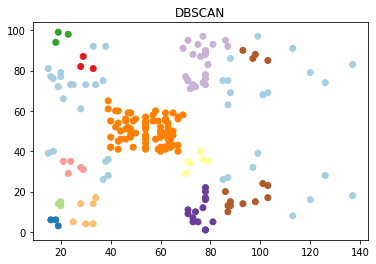

In [120]:

plt.scatter(X[:,0], X[:,1],c=labels, cmap='Paired')
plt.title("DBSCAN")